In [1]:
from sklearn.linear_model import LogisticRegression
import utils

In [2]:
path = r"../data_files/1000_aps/ecq_B_1000_all_one_per_iso_0_131017.parquet"
df = utils.load_data(path)

# choose your desired bounds (including the end points)
bounds_list = [((i-1)*10000,i*10000) for i in range(1,13)]

# choose your model
model = LogisticRegression(max_iter = 3000)

# choose your desired number of a_p's
n_ap = 100

res_dict = {}
# Example usage
for bounds in bounds_list:
   lower_bound, upper_bound = bounds
   res_dict[bounds] = utils.Generate_AccByApRange_df(df, lower_bound, upper_bound, model, n_ap, ap_selection="rolling", rolling_jump=25)

Loaded the big dataset with 1000 a_p's and 574948 curves..
**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [0, 10000]..
There are 38042 curves within the conductor range [0, 10000].
**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [10000, 20000]..
There are 43175 curves within the conductor range [10000, 20000].
**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [20000, 30000]..
There are 44141 curves within the conductor range [20000, 30000].
**************************************************
Generating the accuracy by the a_p ranges dataframe for curves with condutor range [30000, 40000]..
There are 44324 curves within the conductor range [30000, 40000].
**************************************************
Generating the accuracy by the

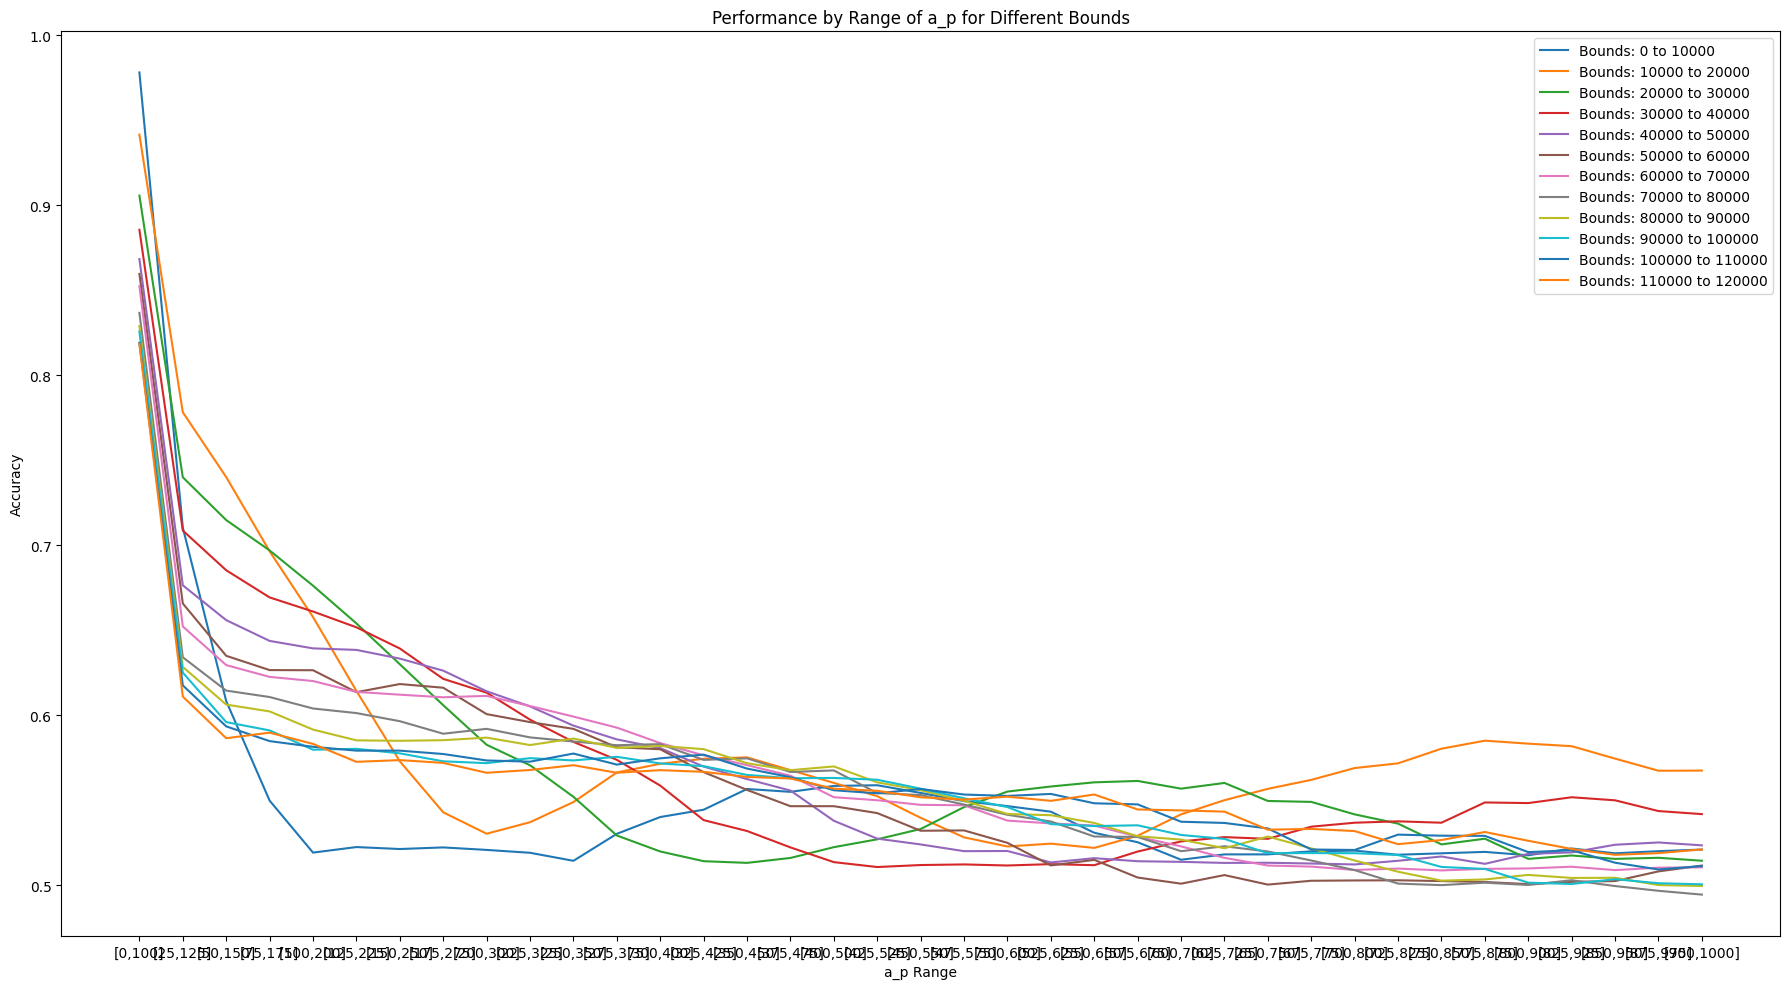

In [4]:
utils.plot_AccuracyByApRange(res_dict, size = (18,10))

# Too many lines. Let's get a closer look of first half of the conductor bound list

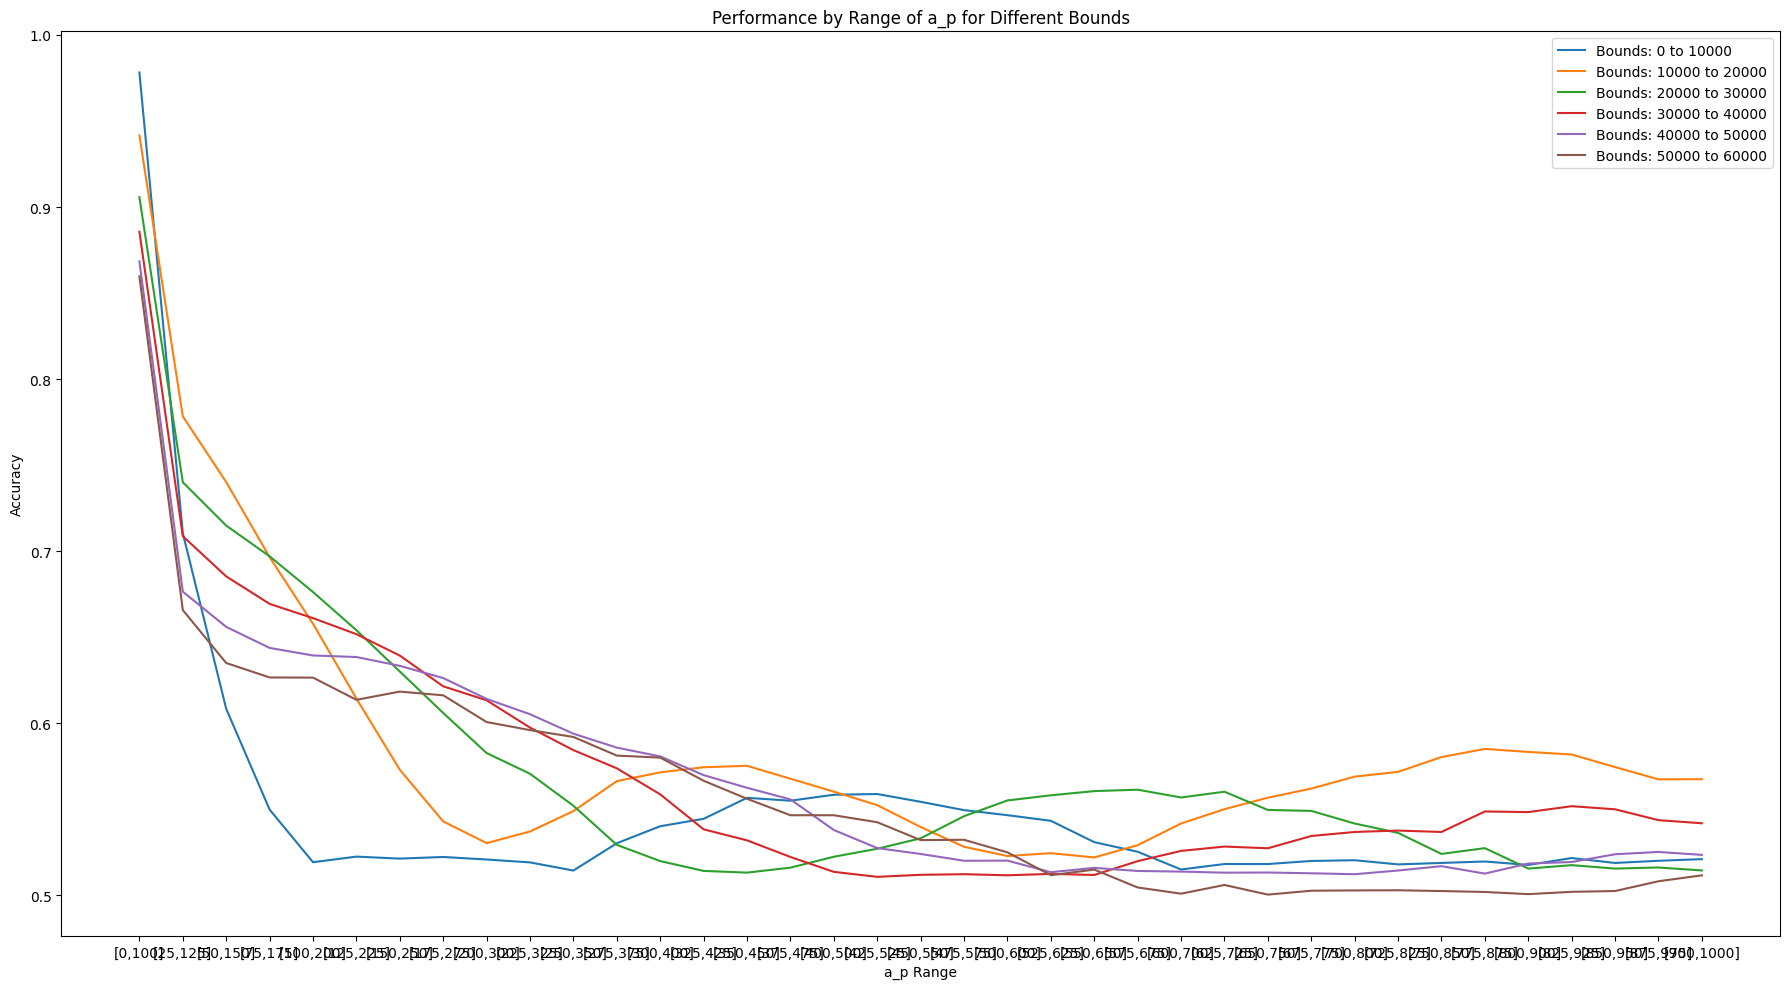

In [23]:
conds = list(res_dict.keys())
# only keep the first half of the list
# conds = [conds[i] for i in range(len(conds)) if i % 2 == 0]
# conds = conds[::2]
conds = conds[:len(conds)//2]
res_dict_even = {k: res_dict[k] for k in conds}
utils.plot_AccuracyByApRange(res_dict_even, size = (18,10))